<a href="https://colab.research.google.com/github/333pehr/Avocado_maturity_meter/blob/main/AvocadoMaturityMeter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Dataset to the Project

At first, we will check the data type of the features exist in dataset `data.csv`

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

row_dataset = pd.read_csv('data.csv')
row_dataset.dtypes

avocado_no                       int64
number_of_days_from_harvest      int64
L                              float64
a                              float64
b                              float64
maturity_state                   int64
dtype: object

In [30]:
row_dataset.describe()

,avocado_no,number_of_days_from_harvest,L,a,b,maturity_state
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,5.527027,9.094595,37.501041,-10.067541,18.516822,0.500000
std,2.883498,5.849185,4.424240,4.042415,4.935462,0.663162
min,1.000000,1.000000,21.750000,-16.540000,1.700000,0.000000
25%,3.000000,4.000000,35.707500,-12.810000,16.267500,0.000000
50%,6.000000,8.000000,38.090000,-11.015000,19.225000,0.000000
75%,8.000000,14.000000,39.900000,-8.535000,21.740000,1.000000
max,10.000000,21.000000,96.650000,4.100000,35.010000,2.000000


## Row Data

We will show the row version of the data as table here

In [31]:
row_dataset.head()

,avocado_no,number_of_days_from_harvest,L,a,b,maturity_state
0,1,1,40.48,-12.36,18.76,0
1,1,1,40.64,-14.05,22.17,0
2,1,1,38.29,-13.48,17.91,0
3,1,1,41.77,-11.58,20.91,0
4,1,1,38.27,-10.72,18.54,0


### Row Data Visualisation
Without conducting any preprocessing, a discernible relationship between color features `L`, `a` and `b` can be observed from the graphs below.

##### Range of Color Feature `a` in the Dataset

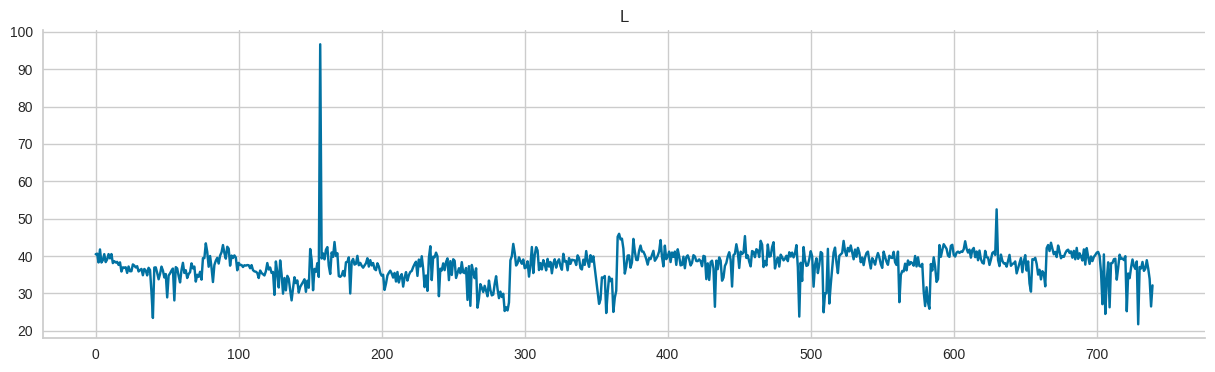

In [32]:
import matplotlib.pyplot as plt

row_dataset['L'].plot(kind='line', figsize=(15, 4), title='L')
plt.gca().spines[['top', 'right']].set_visible(False)

##### Range of Color Feature `L` in the Dataset

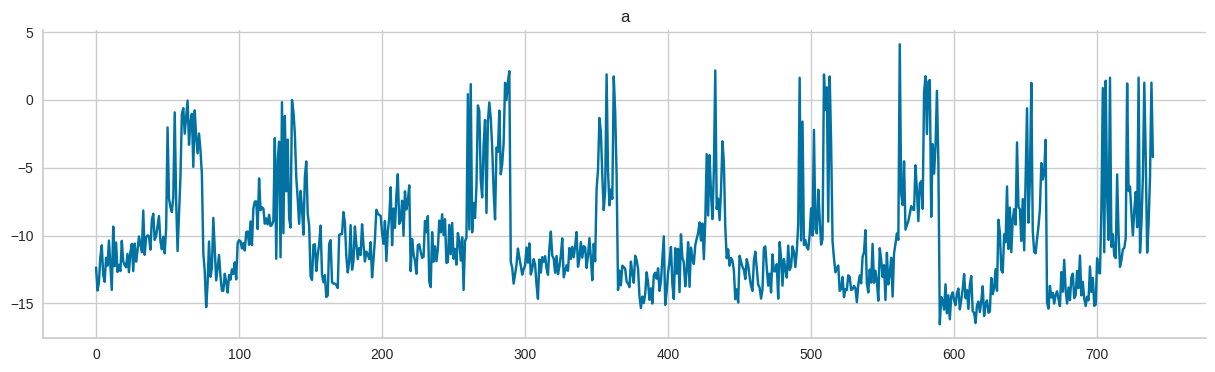

In [33]:
row_dataset['a'].plot(kind='line', figsize=(15, 4), title='a')
plt.gca().spines[['top', 'right']].set_visible(False)

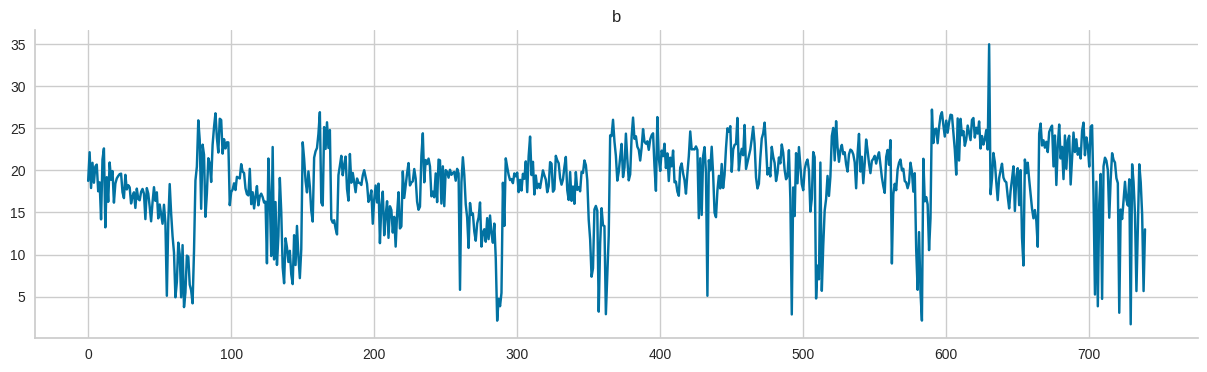

In [34]:
row_dataset['b'].plot(kind='line', figsize=(15, 4), title='b')
plt.gca().spines[['top', 'right']].set_visible(False)

This table is shown only to see if any days have missed for each avocado

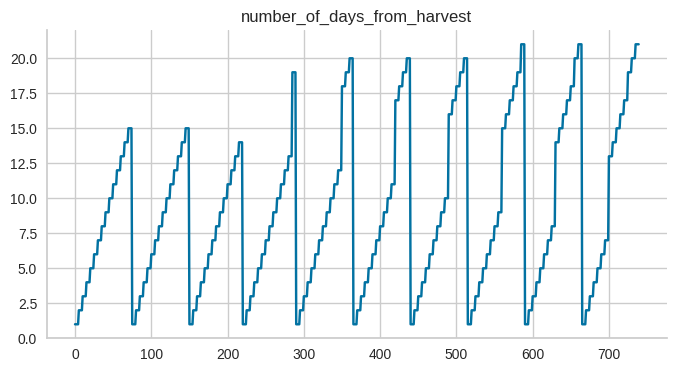

In [35]:
from matplotlib import pyplot as plt
row_dataset['number_of_days_from_harvest'].plot(kind='line', figsize=(8, 4), title='number_of_days_from_harvest')
plt.gca().spines[['top', 'right']].set_visible(False)

## Data Manipulation and Processing

Given that five different images are captured each day, there are five distinct sets of L*a*b color values available in the dataset. To streamline data processing and reduce its volume, we will aggregate the number of images taken for each day and compute the mean values for the color features L, a, and b.

In [36]:
# days_group = row_dataset.groupby(['avocado_no', 'number_of_days_from_harvest'])
# processed_data = days_group.mean()
# processed_data = processed_data.reset_index()
# processed_data.to_csv('processed_data.csv')
# processed_data.head()

processed_data = pd.read_csv('data.csv')
processed_data.head()

,avocado_no,number_of_days_from_harvest,L,a,b,maturity_state
0,1,1,40.48,-12.36,18.76,0
1,1,1,40.64,-14.05,22.17,0
2,1,1,38.29,-13.48,17.91,0
3,1,1,41.77,-11.58,20.91,0
4,1,1,38.27,-10.72,18.54,0


### Data Visualization After Data Manipulation

#### Color feature `L` vs Maturity State



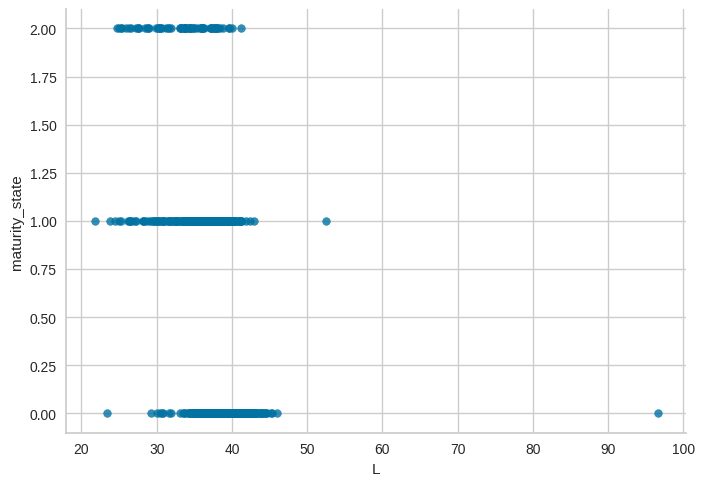

In [37]:
processed_data.plot(kind='scatter', x='L', y='maturity_state', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Color feature `a` vs Maturity State

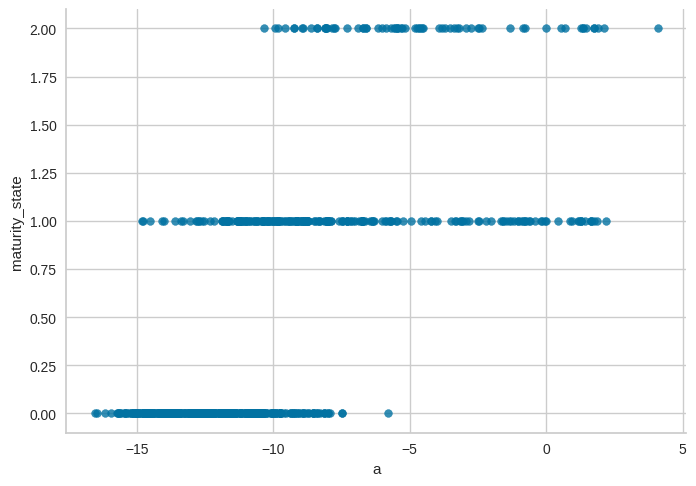

In [38]:
processed_data.plot(kind='scatter', x='a', y='maturity_state', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Color feature `b` vs Maturity State

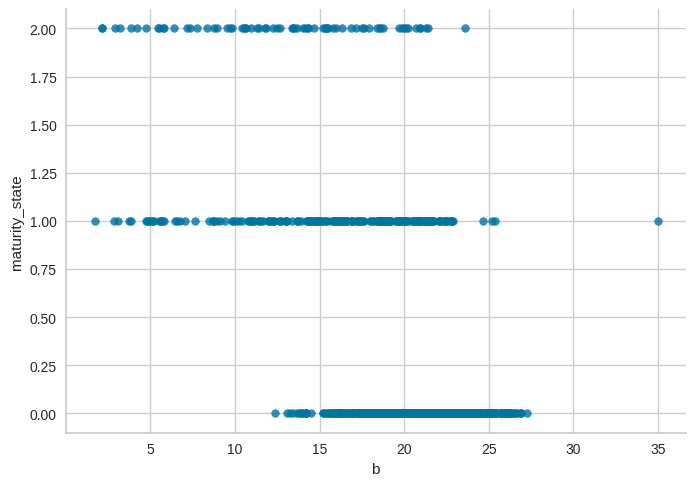

In [39]:
processed_data.plot(kind='scatter', x='b', y='maturity_state', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Visual Comparision Between Range of Color Features in Dataset after Manipulation

Let's compare the range of color features a and L to determine if the relationship we observed in the raw data visualization still holds.

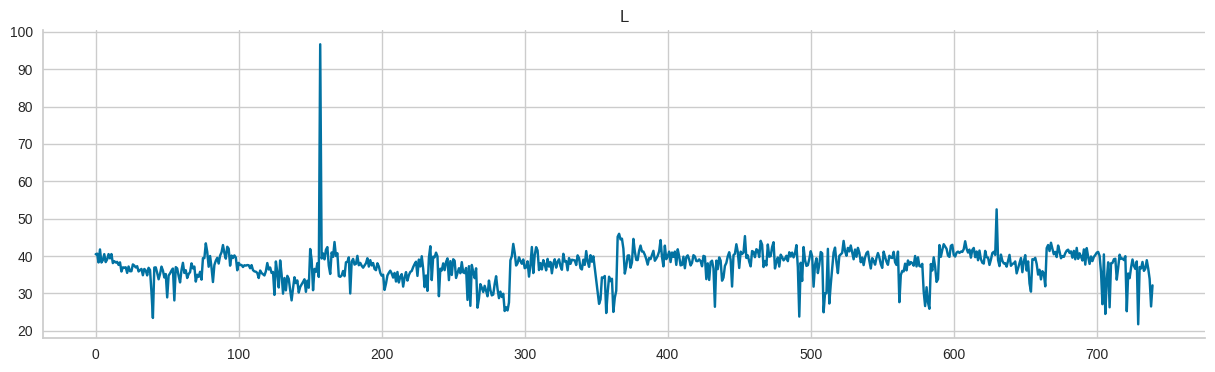

In [40]:
processed_data['L'].plot(kind='line', figsize=(15, 4), title='L')
plt.gca().spines[['top', 'right']].set_visible(False)

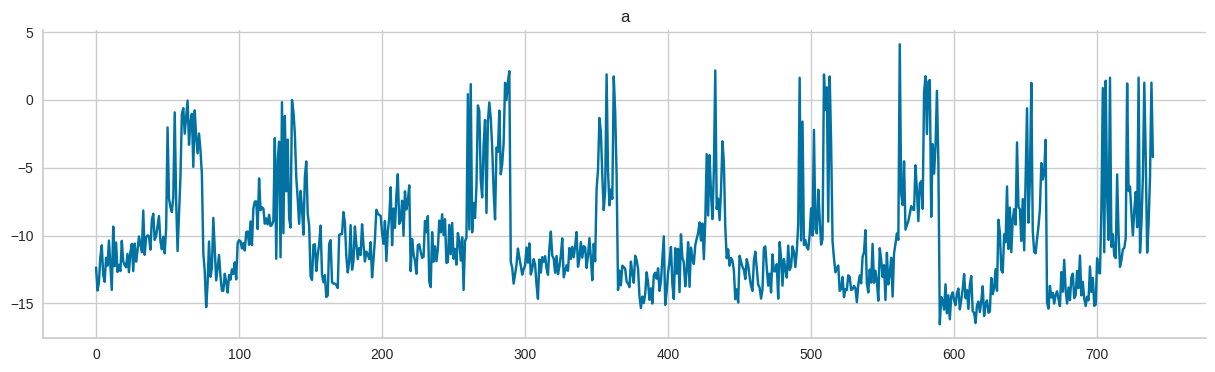

In [41]:
processed_data['a'].plot(kind='line', figsize=(15, 4), title='a')
plt.gca().spines[['top', 'right']].set_visible(False)

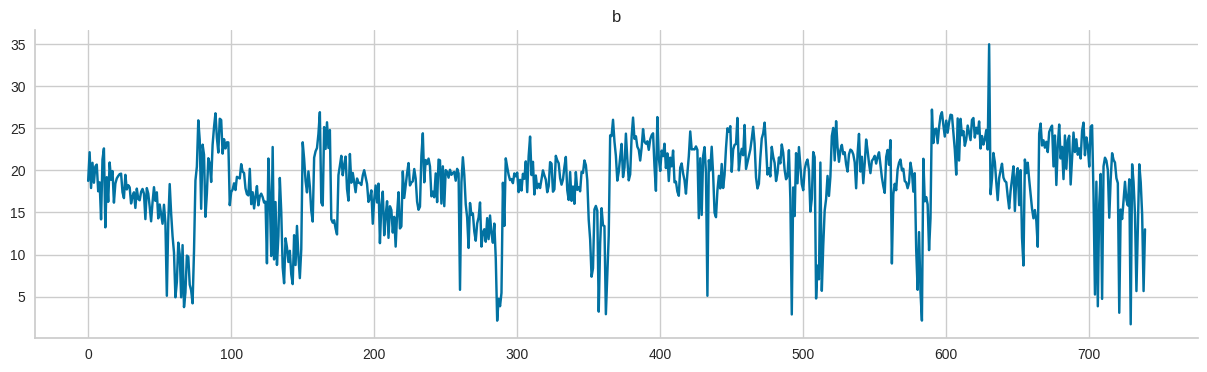

In [42]:
processed_data['b'].plot(kind='line', figsize=(15, 4), title='b')
plt.gca().spines[['top', 'right']].set_visible(False)

#### Heat Map

Heat maps offer a clearer insight into the relationship and correlation between color features and maturity state. As illustrated in the image below:

- The color features L and b exhibit the strongest positive correlation. This indicates a high degree of similarity between L and b in this dataset; an increase in the value of L is accompanied by a corresponding increase in b.

- Conversely, a and b demonstrate the highest negative correlation. This implies an inverse relationship between them; for instance, as a values increase, b values are expected to decrease.

- Furthermore, there is a notable correlation between color feature a and the maturity state. An increase in a values corresponds to a higher maturity level of the avocados.

Incorporating these findings into the project report will enhance the understanding of the relationship between color features and avocado maturity.

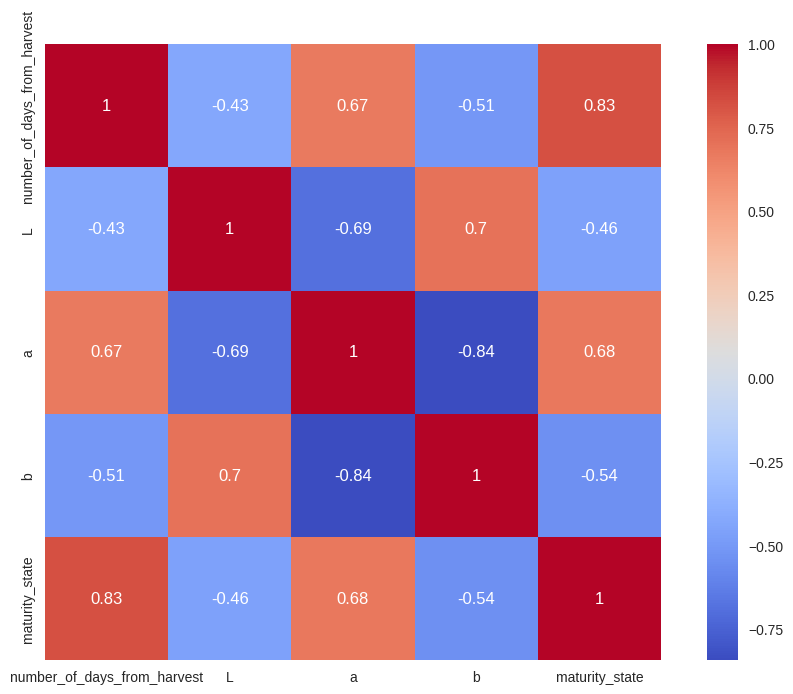

In [43]:
processed_data_heatmap = processed_data.copy()
processed_data_heatmap = processed_data_heatmap.drop(columns = {'avocado_no'})
plt.figure(figsize=(12, 8))
sns.heatmap(processed_data_heatmap.corr(), annot=True, cmap='coolwarm', square= True)
plt.show()

## Modeling

First, Import the necessary packages

In [44]:
from sklearn import svm, neighbors, tree, ensemble, naive_bayes
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Defining the features and target variable

In [45]:
X = processed_data.drop(columns = { 'avocado_no','maturity_state'})  # Select all columns except avocado_no, and maturity_state as feature
y = processed_data['maturity_state']  # Target col.
X.head()

,number_of_days_from_harvest,L,a,b
0,1,40.48,-12.36,18.76
1,1,40.64,-14.05,22.17
2,1,38.29,-13.48,17.91
3,1,41.77,-11.58,20.91
4,1,38.27,-10.72,18.54


In [46]:
from pycaret.classification import *

In [47]:
experiment = setup(processed_data, target="maturity_state")

,Description,Value
0,Session id,8369
1,Target,maturity_state
2,Target type,Multiclass
3,Original data shape,"(740, 6)"
4,Transformed data shape,"(740, 6)"
5,Transformed train set shape,"(518, 6)"
6,Transformed test set shape,"(222, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [48]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9788,0.9984,0.9788,0.9797,0.9787,0.9605,0.9614,0.6950
xgboost,Extreme Gradient Boosting,0.9768,0.9982,0.9768,0.9777,0.9765,0.9567,0.9575,0.0920
et,Extra Trees Classifier,0.9633,0.9967,0.9633,0.9644,0.9625,0.9316,0.9325,0.1790
gbc,Gradient Boosting Classifier,0.9595,0.0000,0.9595,0.9608,0.9589,0.9239,0.9250,0.4470
rf,Random Forest Classifier,0.9440,0.9958,0.9440,0.9483,0.9419,0.8949,0.8982,0.4050
dt,Decision Tree Classifier,0.9303,0.9478,0.9303,0.9306,0.9294,0.8710,0.8716,0.0350
lr,Logistic Regression,0.8571,0.0000,0.8571,0.8518,0.8473,0.7284,0.7322,0.1140
knn,K Neighbors Classifier,0.8571,0.9704,0.8571,0.8535,0.8519,0.7307,0.7339,0.0630
nb,Naive Bayes,0.8474,0.9524,0.8474,0.8480,0.8416,0.7136,0.7177,0.0370
qda,Quadratic Discriminant Analysis,0.8474,0.0000,0.8474,0.8501,0.8405,0.7114,0.7165,0.0560


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [49]:
predict_model(best_model , processed_data.drop("maturity_state", axis = 1))

,avocado_no,number_of_days_from_harvest,L,a,b,prediction_label,prediction_score
0,1,1,40.480000,-12.36,18.760000,0,1.0000
1,1,1,40.639999,-14.05,22.170000,0,1.0000
2,1,1,38.290001,-13.48,17.910000,0,1.0000
3,1,1,41.770000,-11.58,20.910000,0,1.0000
4,1,1,38.270000,-10.72,18.540001,0,1.0000
...,...,...,...,...,...,...,...
735,10,21,38.889999,-11.26,20.730000,1,0.9999
736,10,21,36.669998,-9.11,18.600000,1,0.9994
737,10,21,33.869999,-5.69,14.760000,1,0.9981
738,10,21,26.520000,1.27,5.650000,1,0.9972


In [50]:
save_model(best_model, model_name = "Extra Trees Classifier")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['avocado_no',
                                              'number_of_days_from_harvest', 'L',
                                              'a', 'b'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=N...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
            

In [51]:
df = pd.read_csv('data.csv')
df
from sklearn.preprocessing import OneHotEncoder
from pycaret.classification import *
experiment = setup(df, target = "number_of_days_from_harvest")
best_model = compare_models()

,Description,Value
0,Session id,6681
1,Target,number_of_days_from_harvest
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20"
4,Original data shape,"(740, 6)"
5,Transformed data shape,"(740, 6)"
6,Transformed train set shape,"(518, 6)"
7,Transformed test set shape,"(222, 6)"
8,Numeric features,5
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.2684,0.8152,0.2684,0.2568,0.2446,0.2271,0.2292,0.2670
rf,Random Forest Classifier,0.2373,0.8224,0.2373,0.2329,0.2212,0.1946,0.1963,0.2900
dt,Decision Tree Classifier,0.2316,0.5937,0.2316,0.2255,0.2151,0.1881,0.1898,0.0730
xgboost,Extreme Gradient Boosting,0.2163,0.8011,0.2163,0.2158,0.2055,0.1720,0.1733,0.6990
gbc,Gradient Boosting Classifier,0.2143,0.0000,0.2143,0.2069,0.1967,0.1700,0.1720,3.3240
lightgbm,Light Gradient Boosting Machine,0.2085,0.7754,0.2085,0.1974,0.1932,0.1640,0.1654,2.7390
lda,Linear Discriminant Analysis,0.2027,0.0000,0.2027,0.1554,0.1600,0.1579,0.1622,0.0340
lr,Logistic Regression,0.2007,0.0000,0.2007,0.2001,0.1843,0.1554,0.1576,0.4290
ridge,Ridge Classifier,0.1931,0.0000,0.1931,0.1158,0.1369,0.1477,0.1531,0.0580
knn,K Neighbors Classifier,0.1871,0.7074,0.1871,0.1778,0.1704,0.1397,0.1414,0.0940


Processing:   0%|          | 0/65 [00:00<?, ?it/s]